# Ejercicios de visualización Seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('/kaggle/input/pokemon/Pokemon.csv', sep =",")

In [2]:
df.head(15)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


## 1. Haz un countplot con el número de pokémons en cada generación

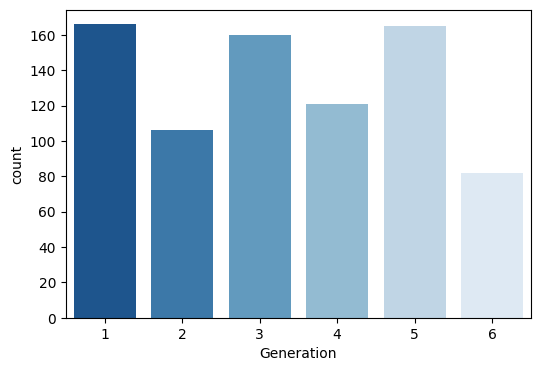

In [3]:
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="Generation",
              #hue="Generation",
              data=df, palette="Blues_r") # nombre de la palette
plt.show()

## 2. Representar la frecuencia de pokémons por tipo 1 en un gráfico de barras.

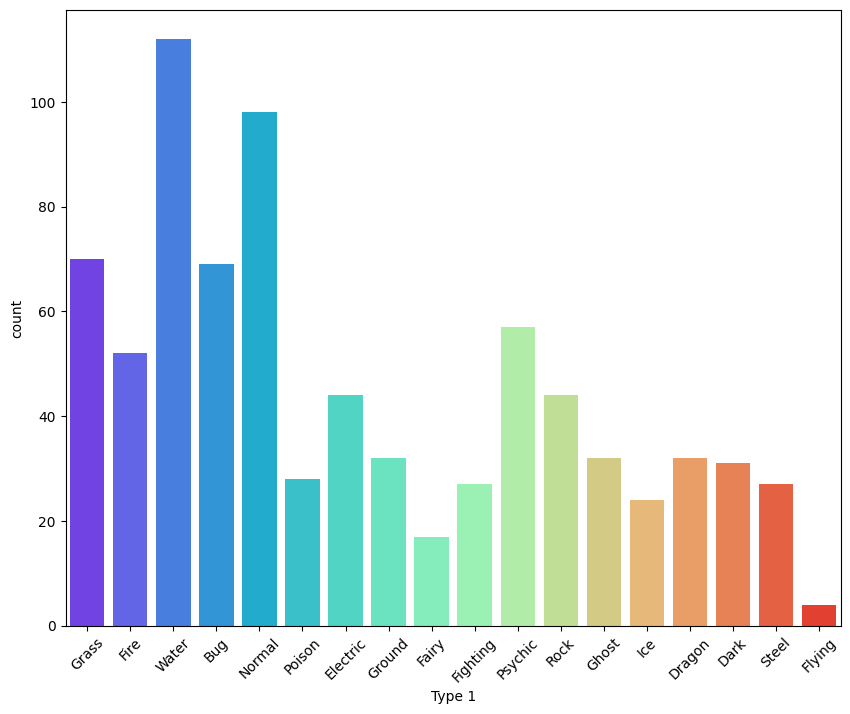

In [9]:
fig, ax= plt.subplots(figsize=(10,8))
sns.countplot(x='Type 1',
             data=df,
             palette='rainbow')
plt.xticks(rotation=45)
plt.show()

## 3. Haz un diagrama de barras con el número de pokémons tipo 1 igual a "Grass" o "Fire"

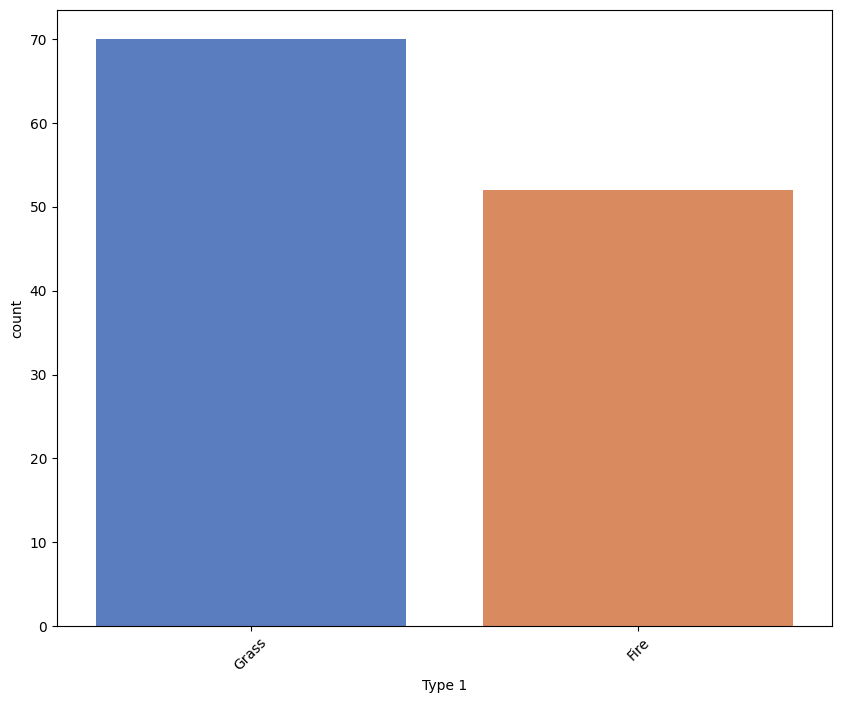

In [12]:
filterdf = df[df['Type 1'].isin(['Grass', 'Fire'])]
fig, ax= plt.subplots(figsize=(10,8))
sns.countplot(x='Type 1',
             data=filterdf,
             palette='muted')
plt.xticks(rotation=45)
plt.show()

## 4. Haz un histograma con los puntos de salud HP de los pokémons, utiliza el color verde



In [13]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


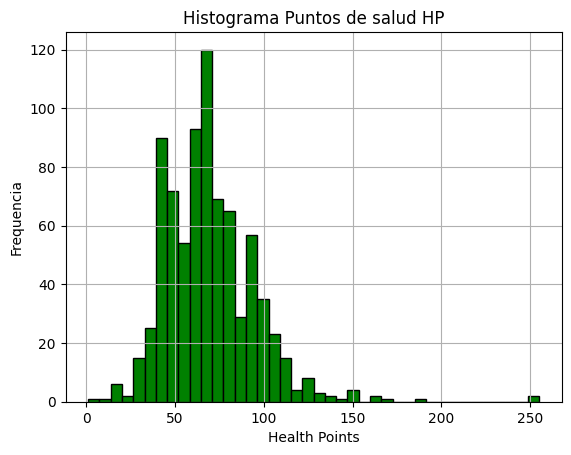

In [15]:
plt.hist(df['HP'], bins=40, color='green', edgecolor='black')
plt.title('Histograma Puntos de salud HP')
plt.xlabel('Health Points')
plt.ylabel('Frequencia')
plt.grid(True)
plt.show()

## 5. Haz un histograma con la frecuencia de pokémons por rapidez (Speed).

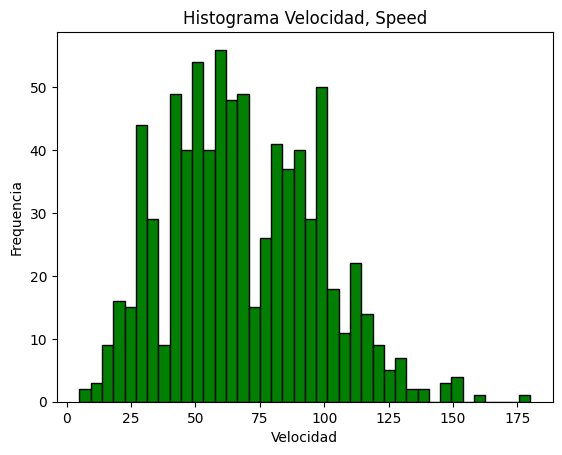

In [16]:
plt.hist(df['Speed'], bins=40, color='green', edgecolor='black')
plt.title('Histograma Velocidad, Speed')
plt.xlabel('Velocidad')
plt.ylabel('Frequencia')
plt.show()

## 6. Haz un histograma con los puntos de salud (HP) de los pokémons (Type 1) = "Fire"

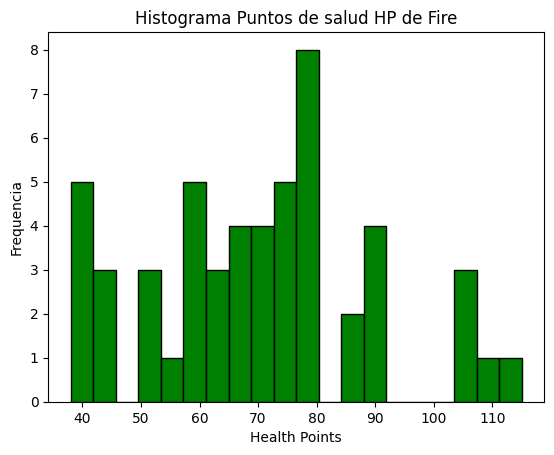

In [18]:
dfFire =df[df['Type 1']== "Fire"]
plt.hist(dfFire['HP'], bins=20, color='green', edgecolor='black')
plt.title('Histograma Puntos de salud HP de Fire')
plt.xlabel('Health Points')
plt.ylabel('Frequencia')

plt.show()

## 7. Haz un scatter plot y un hex plot con los valores de "Attack" y "Defense"de los pokémons

/tmp/ipykernel_33/2197628616.py:3: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  sns.jointplot(ax=axes[1], x="Attack", y="Defense",kind='hex', cmap='Greens', data=df)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


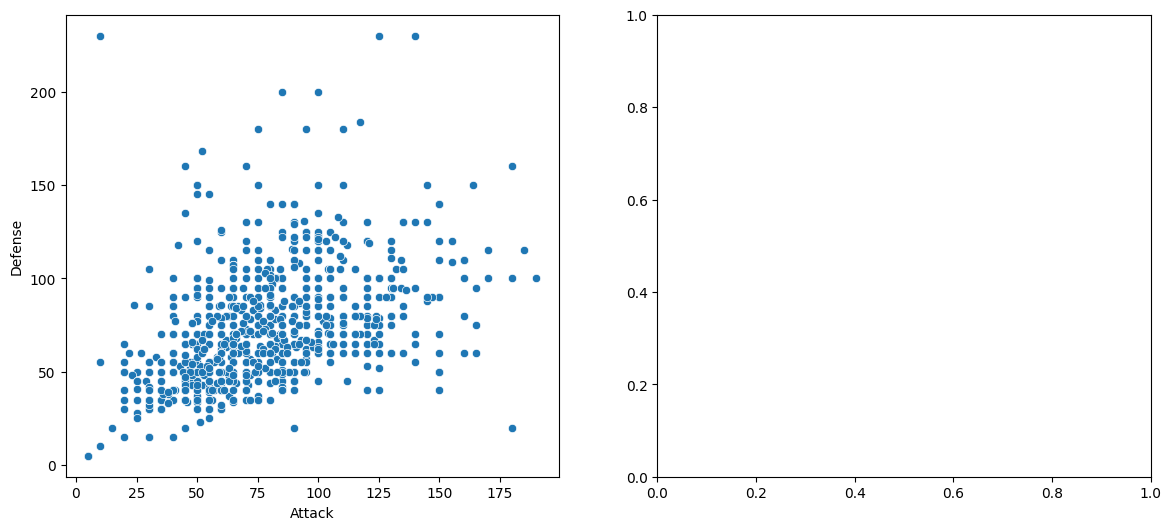

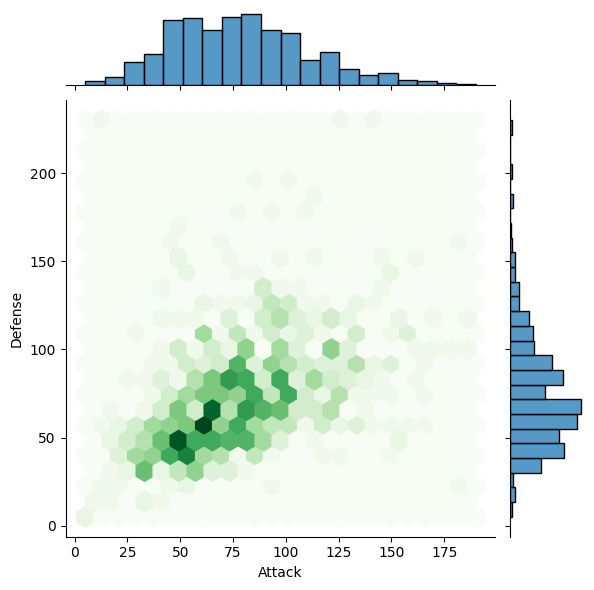

In [28]:
fig, axes = plt.subplots(1,2,figsize=(14,6)) 
sns.scatterplot(ax=axes[0], x="Attack", y="Defense",data=df)
sns.jointplot(ax=axes[1], x="Attack", y="Defense",kind='hex', cmap='Greens', data=df)
plt.show()

/tmp/ipykernel_33/3211224195.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="Attack", y="Defense", data=df, palette="rainbow", ax=axes[0])
/tmp/ipykernel_33/3211224195.py:11: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  sns.jointplot(x="Attack", y="Defense", kind='hex', cmap='Greens', data=df, ax=axes[1])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


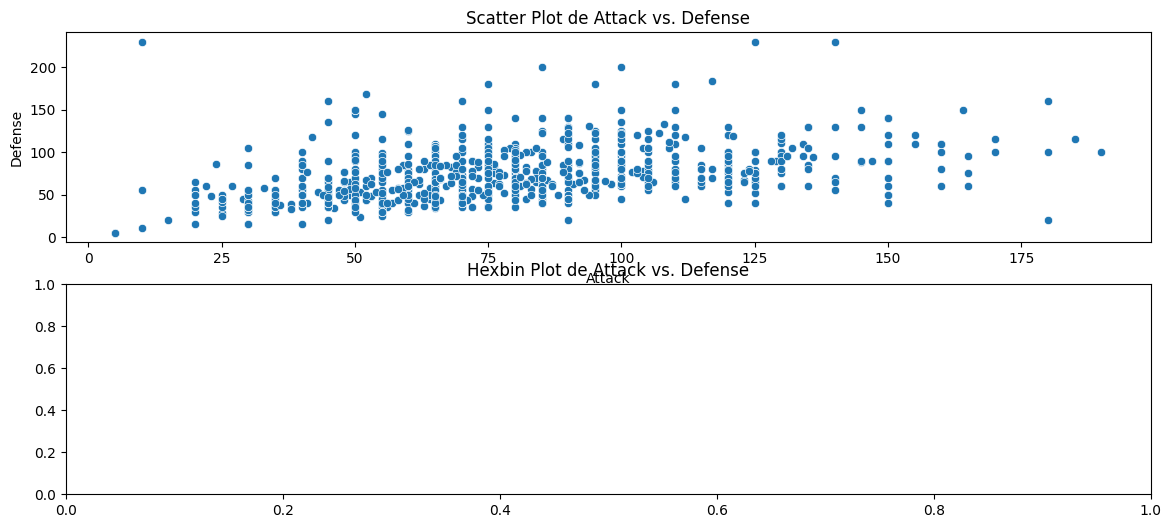

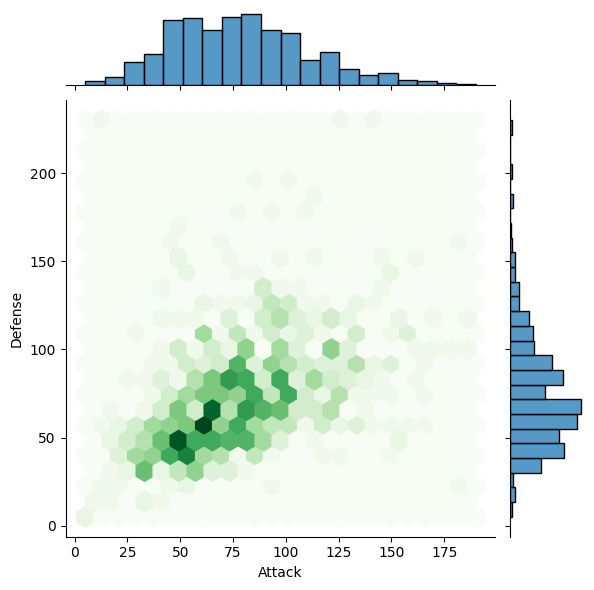

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the figure and axes
fig, axes = plt.subplots(2, 1, figsize=(14, 6))

# Scatter plot
sns.scatterplot(x="Attack", y="Defense", data=df, palette="rainbow", ax=axes[0])
axes[0].set_title('Scatter Plot de Attack vs. Defense')

sns.jointplot(x="Attack", y="Defense", kind='hex', cmap='Greens', data=df, ax=axes[1])
axes[1].set_title('Hexbin Plot de Attack vs. Defense')
# Remove the extra axes created by jointplot
#axes[1].remove()

# Show the plots
plt.show()


## 8. Haz un scatter hex plot con los valores de "Attack" y "Defense"de los pokémons tipo "Water" y "Fire"

/tmp/ipykernel_33/3061579829.py:4: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  sns.jointplot(x='Attack', y= 'Defense',kind='hex', data= dfwafi, ax= ax[1])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


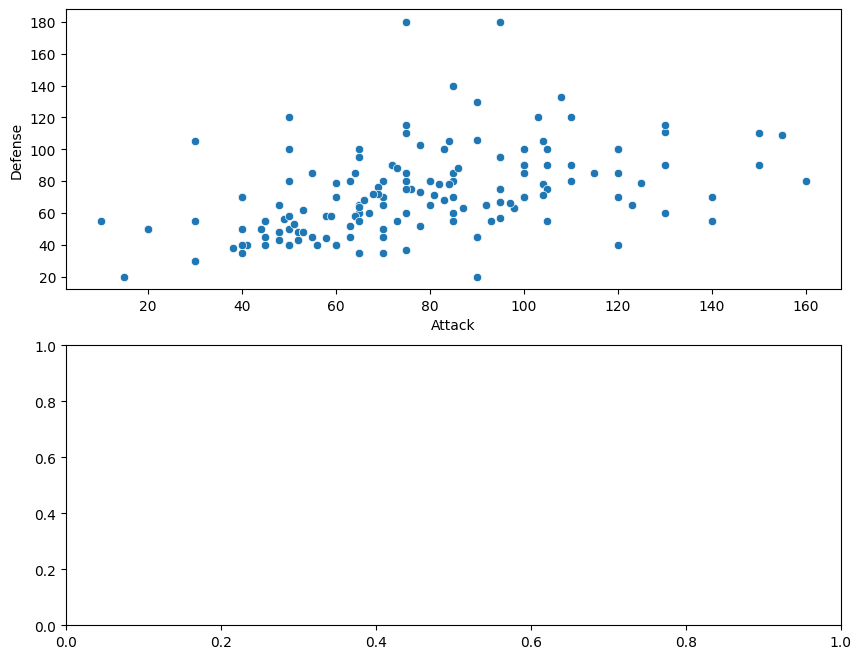

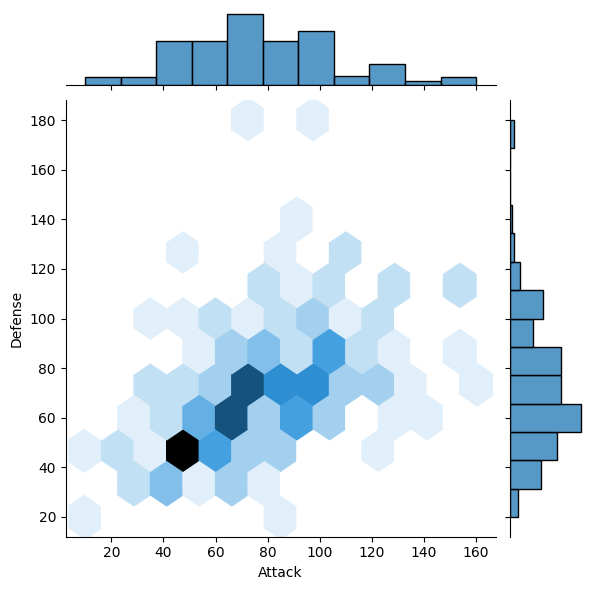

In [42]:
dfwafi = df[df['Type 1'].isin(['Water', 'Fire'])]
fig , ax = plt.subplots(2,1 , figsize=(10,8))
sns.scatterplot(x="Attack", y ="Defense", data= dfwafi, ax= ax[0])
sns.jointplot(x='Attack', y= 'Defense',kind='hex', data= dfwafi, ax= ax[1])

plt.show()

## 9. Haz un KDE plot con la salud y el ataque de los pokémons

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

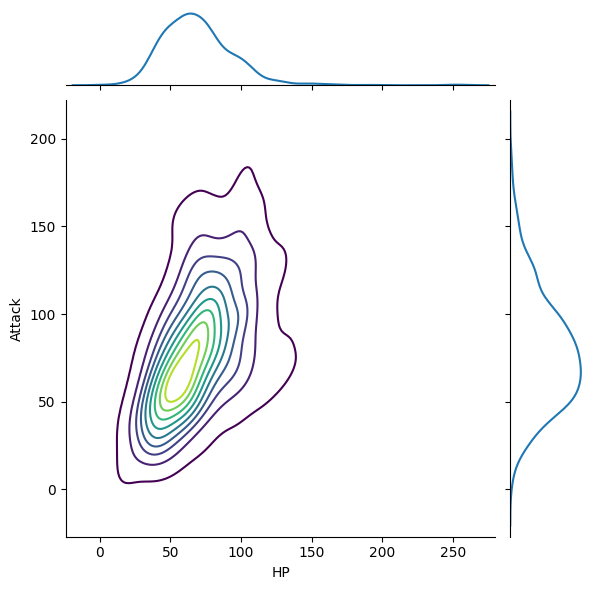

In [46]:
sns.jointplot(x='HP', y='Attack', kind='kde', data=df, cmap='viridis')
plt.show()

## 10. Haz una grafica de caja con el ataque de los pokémons legendarios y no legendarios.

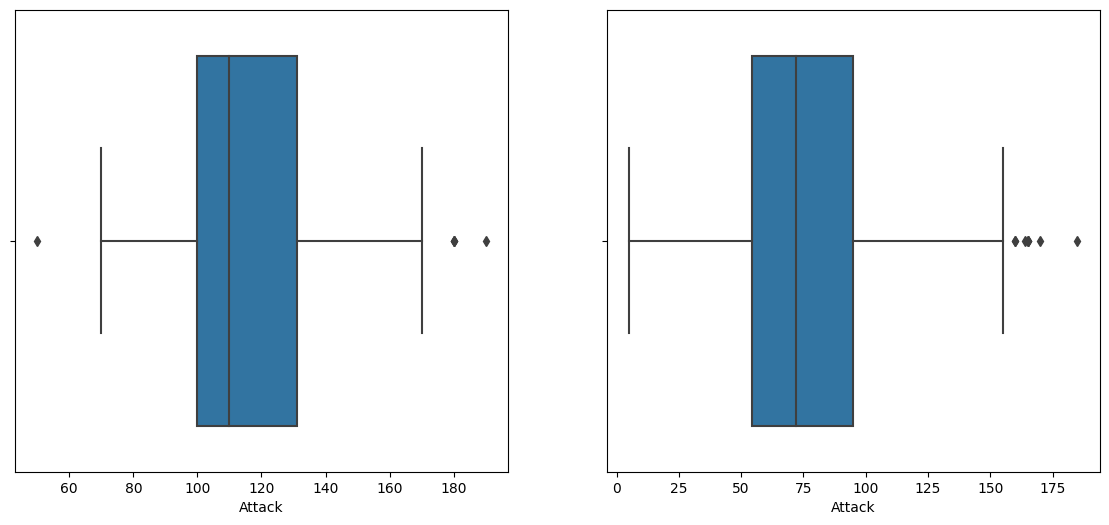

In [57]:
df.head()
dflegen=df[df['Legendary']==True]
dfnolegen=df[df['Legendary']==False]
fig, ax = plt.subplots(1,2, figsize=(14,6))
sns.boxplot(ax= ax[0], x='Attack', data=dflegen)
sns.boxplot(ax= ax[1], x='Attack', data=dfnolegen)
plt.show()

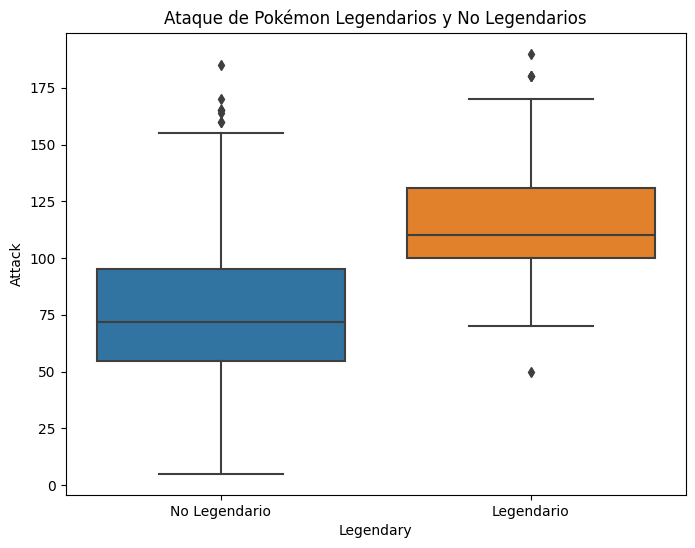

In [53]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='Legendary', y='Attack', data=df)
plt.title('Ataque de Pokémon Legendarios y No Legendarios')
plt.xlabel('Legendary')
plt.ylabel('Attack')
plt.xticks([0, 1], ['No Legendario', 'Legendario'])  # Etiquetas en el eje x
plt.show()


## 11. Haz una grafica de violin con el ataque de los pokémons legendarios y no legendarios.

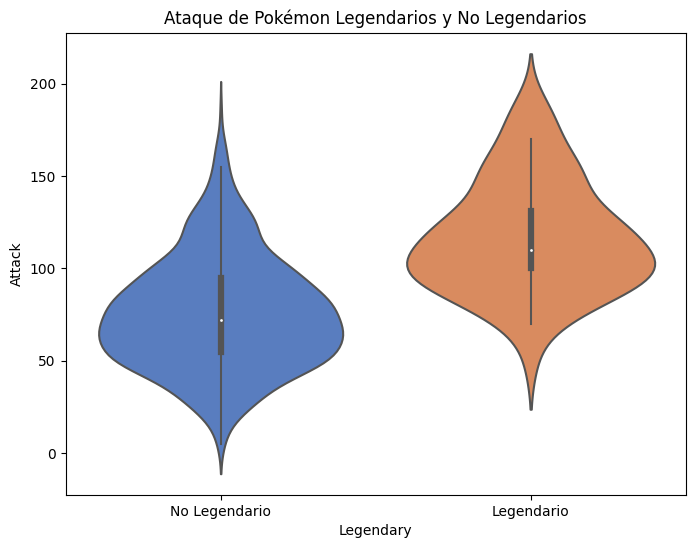

In [58]:
# Crear la gráfica de violín
plt.figure(figsize=(8, 6))
sns.violinplot(x='Legendary', y='Attack', data=df, palette='muted')
plt.title('Ataque de Pokémon Legendarios y No Legendarios')
plt.xlabel('Legendary')
plt.ylabel('Attack')
plt.xticks([0, 1], ['No Legendario', 'Legendario'])  # Etiquetas en el eje x
plt.show()

## 12. Obtén un Displot plot del ataque para legendarios y no legendarios (en columnas) y por generaciones en cada fila.

In [ ]:

sns.displot(x='Legendary', y='Attack')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


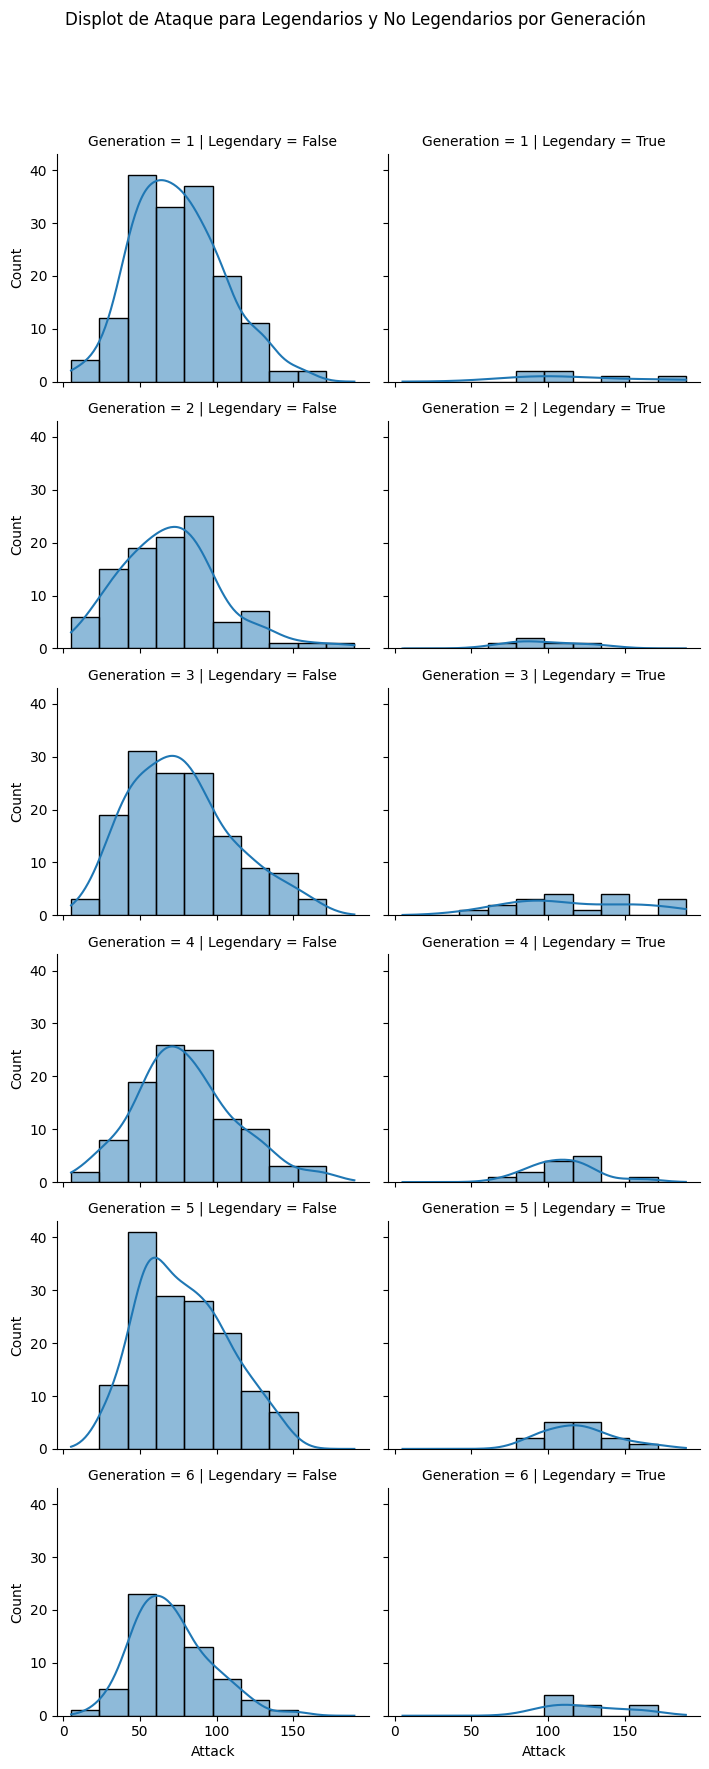

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el Displot plot
sns.displot(data=df, x='Attack', col='Legendary', row='Generation', kind='hist', bins=10, kde=True, height=3, aspect=1.2)
plt.subplots_adjust(top=0.9)
plt.suptitle('Displot de Ataque para Legendarios y No Legendarios por Generación')
plt.show()


## 13. Haz un pairplot y compara los puntos de salud (HP), el ataque y la defensa de los pokémons.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


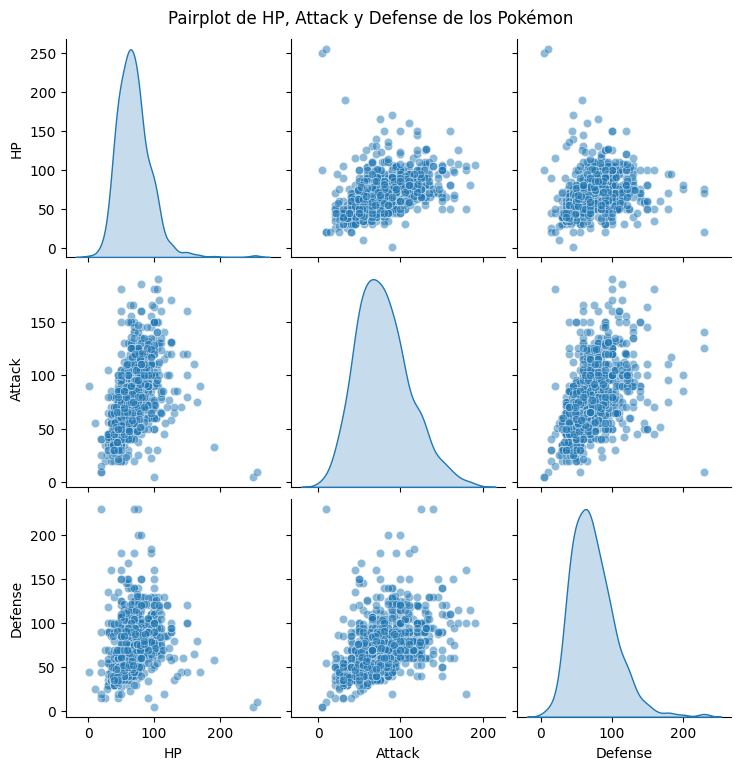

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las columnas de interés
columns_of_interest = ['HP', 'Attack', 'Defense']

# Crear el pairplot
sns.pairplot(df[columns_of_interest], diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot de HP, Attack y Defense de los Pokémon', y=1.02)
plt.show()


## 14. Haz boxplots de la variable `'Total'` distiguiendo por generación y entre legendarios y no legendarios.

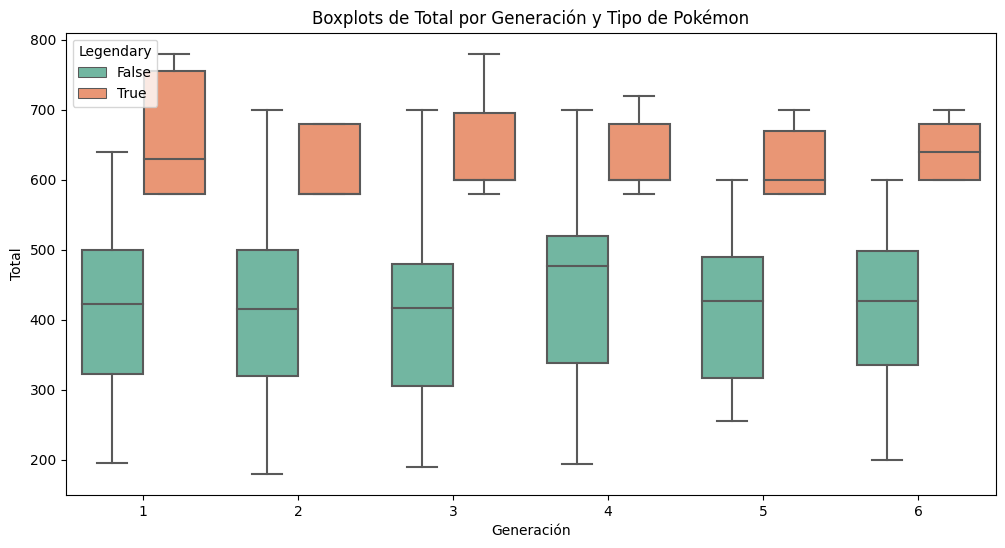

In [61]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Generation', y='Total', hue='Legendary', data=df, palette='Set2')
plt.title('Boxplots de Total por Generación y Tipo de Pokémon')
plt.xlabel('Generación')
plt.ylabel('Total')
plt.legend(title='Legendary', loc='upper left')
plt.show()

## 15. Haz un heatmap para comparar la correlación entre salud, ataque, ataque especial, defensa, defensa especial y velocidad.

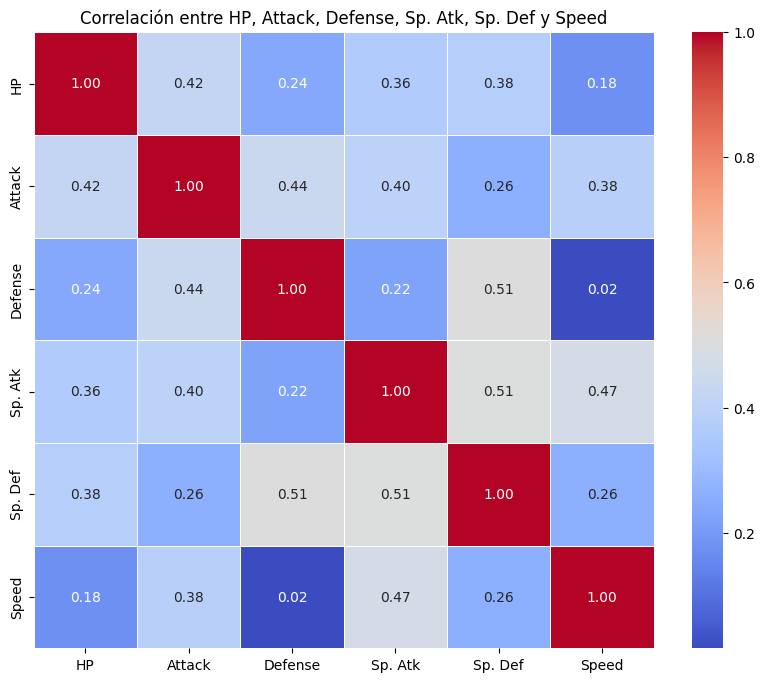

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las columnas de interés
columns_of_interest = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

# Calcular la matriz de correlación
correlation_matrix = df[columns_of_interest].corr()

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlación entre HP, Attack, Defense, Sp. Atk, Sp. Def y Speed')
plt.show()


## 16. Encontrar los 5 mejores pokémons con respecto a la columna "Total", del tipo "Electric", "Fire", "Water" y comparar su salud, ataque, defensa y velocidad en un mapa de calor

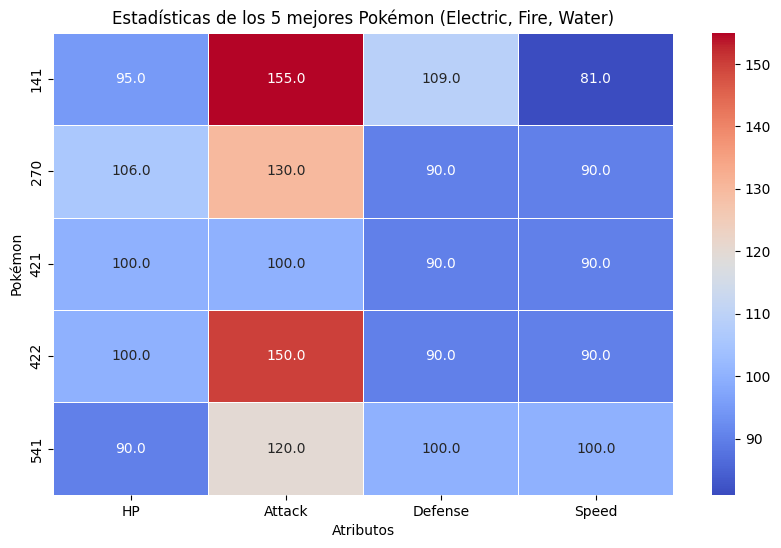

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Paso 1: Filtrar el DataFrame para incluir solo los tipos "Electric", "Fire" y "Water"
filtered_df = df[df['Type 1'].isin(['Electric', 'Fire', 'Water'])]

# Paso 2: Ordenar los Pokémon por la columna "Total" en orden descendente
sorted_df = filtered_df.sort_values(by='Total', ascending=False)

# Paso 3: Seleccionar los 5 mejores Pokémon
top_5_pokemon = sorted_df.head(5)

# Paso 4: Filtrar el DataFrame original para incluir solo los 5 mejores Pokémon
top_5_stats = df[df['Name'].isin(top_5_pokemon['Name'])]

# Paso 5: Seleccionar las columnas 'HP', 'Attack', 'Defense' y 'Speed'
stats_columns = ['HP', 'Attack', 'Defense', 'Speed']
top_5_stats = top_5_stats[stats_columns]

# Crear un mapa de calor para visualizar las estadísticas de los 5 mejores Pokémon
plt.figure(figsize=(10, 6))
sns.heatmap(top_5_stats, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.5)
plt.title('Estadísticas de los 5 mejores Pokémon (Electric, Fire, Water)')
plt.xlabel('Atributos')
plt.ylabel('Pokémon')
plt.show()
